In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
t = np.array([0., 0., 0., 0., 0.7, 1.4, 2.2, 3., 3., 3., 3.])

In [3]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

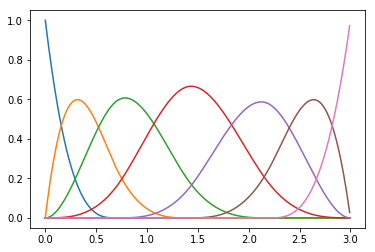

In [4]:
x = np.linspace(0, 3, 400)[:-1]
x_exp = np.zeros(shape=(x.shape[0], 7))
for n in range(7):
    for i in range(x.shape[0]):
        x_exp[i, n] = B(x[i], 3, n, t)
    plt.plot(x, x_exp[:,n])

In [5]:
points = np.array([
    [ 0.04217926,  0.45348837], [ 0.07381371,  0.12790698], [ 0.10544815,  0.25581395], [ 0.14762742,  0.36046512],
    [ 0.31634446,  0.3255814 ], [ 0.37434095,  0.53488372], [ 0.43233743,  1.1744186 ], [ 0.53778559,  1.10465116],
    [ 0.64850615,  1.03488372], [ 0.64850615,  0.8255814 ], [ 0.6801406 ,  0.80232558], [ 0.71704745,  0.68604651],
    [ 0.78031634,  0.8255814 ], [ 0.86467487,  0.74418605], [ 1.03866432,  1.03488372], [ 0.35325132,  3.47674419],
    [ 0.84358524,  2.26744186], [ 0.8172232 ,  1.47674419], [ 1.42355009,  3.1627907 ], [ 1.03866432,  0.59302326],
    [ 0.95957821,  0.39534884], [ 1.02811951,  0.25581395], [ 1.31810193, -0.06976744], [ 1.32864675, -0.6627907 ],
    [ 1.33391916, -0.88372093], [ 1.4340949 , -0.63953488], [ 1.49209139, -1.02325581], [ 1.59753954, -1.04651163],
    [ 1.73989455, -1.43023256], [ 1.96133568, -0.6627907 ], [ 1.95079086, -0.3372093 ], [ 2.01933216,  0.06976744],
    [ 2.07732865,  0.        ], [ 2.11950791,  0.37209302], [ 2.14586995,  0.40697674], [ 2.11950791,  0.86046512],
    [ 2.24077329,  1.25581395], [ 2.30931459,  1.63953488], [ 2.456942  ,  2.37209302], [ 2.4516696 ,  3.        ],
    [ 2.55711775,  3.19767442], [ 2.60456942,  3.1627907 ], [ 2.66783831,  3.11627907], [ 2.5940246 ,  2.74418605],
    [ 2.68892794,  2.80232558], [ 2.77855888,  3.11627907], [ 2.81019332,  2.74418605], [ 2.77328647,  5.04651163],
    [ 2.95782074,  1.87209302], [ 2.98945518,  1.51162791]])

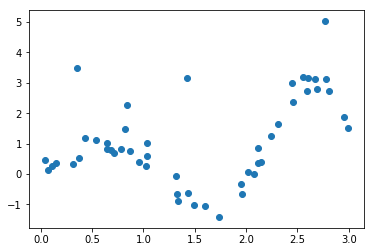

In [6]:
plt.scatter(points[:,0], points[:,1])

In [7]:
X = np.zeros(shape=(points.shape[0], 7))
y = points[:,1]
for n in range(7):
    for i in range(X.shape[0]):
        X[i, n] = B(points[i, 0], 3, n, t)

In [8]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ b
y_smooth = x_exp @ b

In [9]:
sigma_squared_hat = np.mean((y - y_hat)**2)
b_var_hat = np.linalg.inv(X.T @ X) * sigma_squared_hat

In [18]:
se = np.zeros(shape=(x.shape[0]))
for i in range(x.shape[0]):
    se[i] = np.sqrt(x_exp[i] @ np.linalg.inv(X.T @ X) @ x_exp[i]) * np.sqrt(sigma_squared_hat)

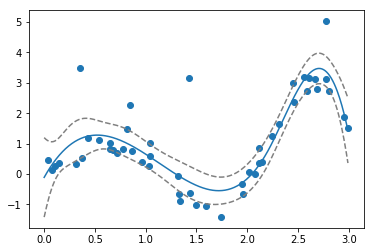

In [23]:
plt.scatter(points[:,0], points[:,1])
plt.plot(x, y_smooth)
plt.plot(x, y_smooth + 1.9 * se, '--', color='gray')
plt.plot(x, y_smooth - 1.9 * se, '--', color='gray')